# YouTube, desktop, фильтрованные трассы, sd/hd/uhd

In [1]:
import os
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

**Подгружаем таблицу с нашими данными**

In [2]:
data = pd.read_csv('data.csv')
data

,Unnamed: 0,Video_number,Density_burst,Density_throttling,Quality
0,0,1,2.575873e+07,1.585146e+06,2160
1,1,2,2.093498e+07,1.511580e+06,2160
2,2,3,2.473638e+07,2.061731e+06,2160
3,3,4,1.771628e+07,2.028604e+06,2160
4,4,5,9.715531e+06,8.426243e+05,2160
...,...,...,...,...,...
145,145,21,2.209689e+06,3.304367e+04,360
146,146,22,2.285067e+06,3.488049e+04,360
147,147,23,1.595180e+06,2.678645e+04,360
148,148,24,2.364400e+06,3.232247e+04,360


In [3]:
data = data.drop(columns=['Unnamed: 0', 'Video_number'])
data

,Density_burst,Density_throttling,Quality
0,2.575873e+07,1.585146e+06,2160
1,2.093498e+07,1.511580e+06,2160
2,2.473638e+07,2.061731e+06,2160
3,1.771628e+07,2.028604e+06,2160
4,9.715531e+06,8.426243e+05,2160
...,...,...,...
145,2.209689e+06,3.304367e+04,360
146,2.285067e+06,3.488049e+04,360
147,1.595180e+06,2.678645e+04,360
148,2.364400e+06,3.232247e+04,360


In [4]:
quality_sdhd = []
i = 0
for index, row in data.iterrows():
    if row['Quality'] == 2160:
        quality_sdhd.append('UHD')
    elif row['Quality'] >= 720:
        quality_sdhd.append('HD')
    else:
        quality_sdhd.append('SD')
    i += 1
data['Quality_label'] = quality_sdhd
data

,Density_burst,Density_throttling,Quality,Quality_label
0,2.575873e+07,1.585146e+06,2160,UHD
1,2.093498e+07,1.511580e+06,2160,UHD
2,2.473638e+07,2.061731e+06,2160,UHD
3,1.771628e+07,2.028604e+06,2160,UHD
4,9.715531e+06,8.426243e+05,2160,UHD
...,...,...,...,...
145,2.209689e+06,3.304367e+04,360,SD
146,2.285067e+06,3.488049e+04,360,SD
147,1.595180e+06,2.678645e+04,360,SD
148,2.364400e+06,3.232247e+04,360,SD


**Посмотрим на данные наглядно**

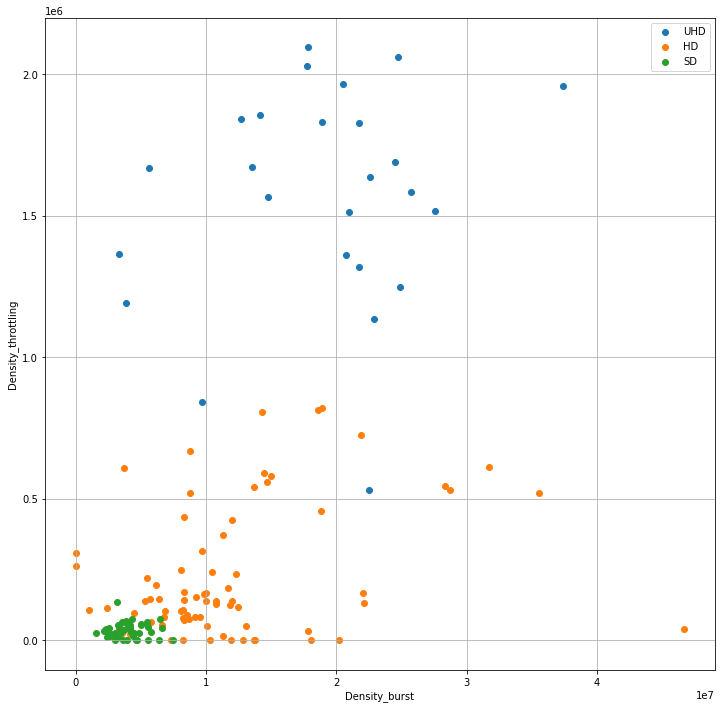

In [5]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)

for quality_label in ['UHD', 'HD', 'SD']:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality_label'][i] == quality_label:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality_label)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

**Перемешаем строки**

In [6]:
data_shuffled = shuffle(data)
data_shuffled

,Density_burst,Density_throttling,Quality,Quality_label
10,5.626413e+06,1.669745e+06,2160,UHD
9,3.860775e+06,1.192906e+06,2160,UHD
72,8.257588e+06,1.064991e+05,1080,HD
138,4.149992e+06,4.431276e+04,360,SD
17,1.475716e+07,1.567211e+06,2160,UHD
...,...,...,...,...
69,1.320000e+02,3.086801e+05,1080,HD
31,2.189573e+07,7.248819e+05,1440,HD
71,9.980039e+06,1.402020e+05,1080,HD
96,9.554201e+06,8.360160e+04,720,HD


**Пробуем обычный KNN**

In [7]:
X = data_shuffled[['Density_burst', 'Density_throttling']]
y = data_shuffled['Quality_label']

best_score = 0.0
i_best_score = 0
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        i_best_score = i

print("\nЛучший резульат:\nn =", i_best_score, "\naccuracy =", best_score)

1   0.82
2   0.7666666666666666
3   0.8066666666666666
4   0.7733333333333334
5   0.7466666666666667
6   0.76
7   0.7533333333333333
8   0.7533333333333333
9   0.7466666666666666
10  0.7333333333333333
11  0.7333333333333333
12  0.74
13  0.7333333333333333
14  0.7466666666666666
15  0.7266666666666667
16  0.74
17  0.74
18  0.74
19  0.7333333333333333
20  0.7466666666666666
21  0.7333333333333333
22  0.74
23  0.74
24  0.7466666666666666
25  0.76
26  0.7466666666666666
27  0.7466666666666666
28  0.74
29  0.7466666666666666

Лучший резульат:
n = 1 
accuracy = 0.82


**Нужно нормализовать данные**

In [8]:
data_norm = data_shuffled.copy()

for column in ['Density_burst', 'Density_throttling']:
    data_norm[column] = ((data_norm[column] - data_norm[column].min()) /
                            (data_norm[column].max() - data_norm[column].min()))
    
data_norm

,Density_burst,Density_throttling,Quality,Quality_label
10,0.120522,0.797071,2160,UHD
9,0.082700,0.569446,2160,UHD
72,0.176886,0.050837,1080,HD
138,0.088896,0.021152,360,SD
17,0.316115,0.748125,2160,UHD
...,...,...,...,...
69,0.000000,0.147351,1080,HD
31,0.469033,0.346029,1440,HD
71,0.213783,0.066926,1080,HD
96,0.204661,0.039907,720,HD


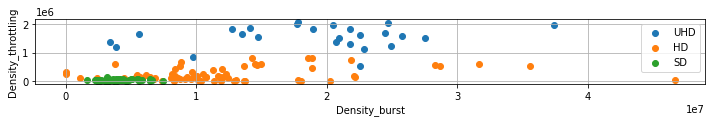

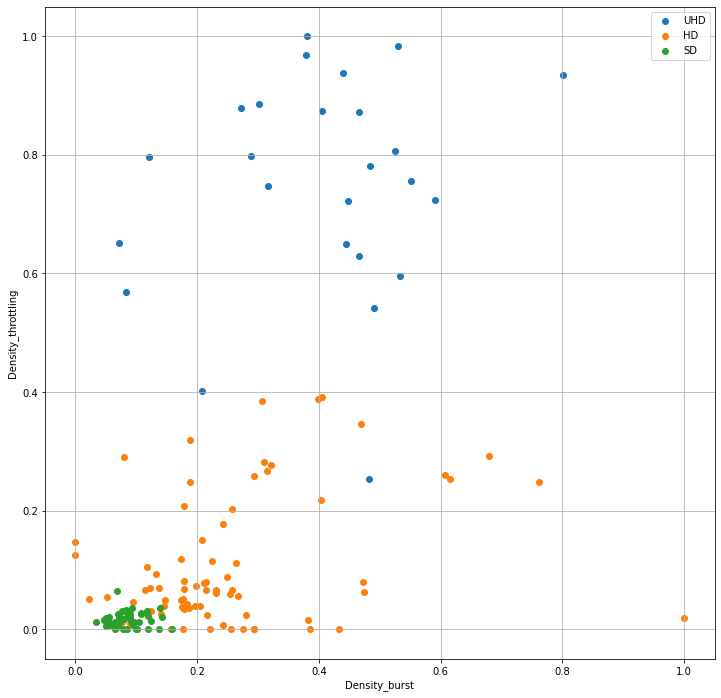

In [9]:
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(1.2)

for quality_label in ['UHD', 'HD', 'SD']:
    x = []
    y = []
    for i in range(len(data)):
        if data['Quality_label'][i] == quality_label:
            x.append(data['Density_burst'][i])
            y.append(data['Density_throttling'][i])
    plt.scatter(x, y, label=quality_label)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

f = plt.figure()
f.set_figwidth(12)
f.set_figheight(12)

for quality_label in ['UHD', 'HD', 'SD']:
    x = []
    y = []
    for i in range(len(data_norm)):
        if data['Quality_label'][i] == quality_label:
            x.append(data_norm['Density_burst'][i])
            y.append(data_norm['Density_throttling'][i])
    plt.scatter(x, y, label=quality_label)
    
plt.xlabel("Density_burst")
plt.ylabel("Density_throttling")
plt.legend()
plt.grid(True)

plt.show()

*По графикам можно понять отличие работы классификаторов с нормализацией и без*

**Снова пробуем KNN, но теперь с нормализованными данными**

In [10]:
X = data_norm[['Density_burst', 'Density_throttling']]
y = data_norm['Quality_label']

best_score = 0.0
i_best_score = 0
for i in range(1, 30):
    model = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(model, X, y, cv=10, scoring = 'accuracy')
    n_spaces = 1 - i // 10
    print(i, ' ' * n_spaces, scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        i_best_score = i

print("\nЛучший резульат:\nn =", i_best_score, "\naccuracy =", best_score)

1   0.8799999999999999
2   0.8800000000000001
3   0.9133333333333334
4   0.9000000000000001
5   0.9066666666666668
6   0.9000000000000001
7   0.9
8   0.8933333333333335
9   0.8933333333333333
10  0.9066666666666668
11  0.8933333333333333
12  0.9000000000000001
13  0.9000000000000001
14  0.9000000000000001
15  0.8933333333333333
16  0.9000000000000001
17  0.8933333333333333
18  0.9000000000000001
19  0.9000000000000001
20  0.8933333333333335
21  0.8933333333333333
22  0.9
23  0.8933333333333333
24  0.8933333333333333
25  0.8866666666666667
26  0.8866666666666667
27  0.8800000000000001
28  0.8800000000000001
29  0.8866666666666667

Лучший резульат:
n = 3 
accuracy = 0.9133333333333334


*По сравнению с ненормированным KNN точность увеличилась — 0.91 против 0.82*

**Пробуем Support Vector Classification**

In [11]:
best_score = 0.0
best_kernel = ''
for i_kernel in (['linear', 'poly', 'rbf', 'sigmoid']):
    X_norm = data_norm[['Density_burst', 'Density_throttling']]
    y_norm = data_norm['Quality_label']
    clf = make_pipeline(StandardScaler(), SVC(gamma='auto', kernel=i_kernel))
    scores = cross_val_score(clf, X_norm, y_norm, cv=10, scoring = 'accuracy')
    n_spaces = 8 - len(i_kernel)
    print('kernel:', i_kernel, ' ' * n_spaces, 'scores_mean:', scores.mean())
    if (scores.mean() > best_score):
        best_score = scores.mean()
        best_kernel = i_kernel
        
print("\nЛучший резульат:\nkernel = ", best_kernel, "\naccuracy = ", best_score)

kernel: linear    scores_mean: 0.9000000000000001
kernel: poly      scores_mean: 0.8866666666666667
kernel: rbf       scores_mean: 0.9000000000000001
kernel: sigmoid   scores_mean: 0.78

Лучший резульат:
kernel =  linear 
accuracy =  0.9000000000000001


*Результат чуть хуже, чем для KNN с нормализованными данными*

**Пробуем CatBoost**

In [12]:
best_score = 0.0
best_params = []
for iter_param in ([100, 200, 500, 1000, 2000]):
    for cv_param in ([5, 10, 20]):
        for lr_param in ([0.05, 0.2, 0.5, 0.7, 1]):
            model = CatBoostClassifier(iterations=iter_param, learning_rate = lr_param, silent=True)
            scores = cross_val_score(model, X, y, cv=cv_param, scoring = 'accuracy')
            n_spaces_i = 1 - iter_param // 1000
            n_spaces_j = 1 - cv_param // 10
            n_spaces_k = 5 - len(str(lr_param))
            print('iterations:', iter_param, ' ' * n_spaces_i,
                  'cv:', cv_param, ' ' * n_spaces_j,
                  'learning_rate:', lr_param,' ' * n_spaces_k,
                  'scores_mean:', scores.mean())
            if (scores.mean() > best_score):
                best_score = scores.mean()
                best_params = [iter_param, cv_param, lr_param]

print("\nЛучший резульат:",
      "\niterations = ", best_params[0],
      "\ncv = ", best_params[1],
      "\nlearning_rate = ", best_params[2],
      "\naccuracy = ", best_score, sep = "")

iterations: 100   cv: 5   learning_rate: 0.05   scores_mean: 0.9133333333333334
iterations: 100   cv: 5   learning_rate: 0.2    scores_mean: 0.9066666666666666
iterations: 100   cv: 5   learning_rate: 0.5    scores_mean: 0.9066666666666666
iterations: 100   cv: 5   learning_rate: 0.7    scores_mean: 0.9
iterations: 100   cv: 5   learning_rate: 1      scores_mean: 0.9
iterations: 100   cv: 10  learning_rate: 0.05   scores_mean: 0.9200000000000002
iterations: 100   cv: 10  learning_rate: 0.2    scores_mean: 0.9066666666666668
iterations: 100   cv: 10  learning_rate: 0.5    scores_mean: 0.9066666666666668
iterations: 100   cv: 10  learning_rate: 0.7    scores_mean: 0.9066666666666668
iterations: 100   cv: 10  learning_rate: 1      scores_mean: 0.9133333333333334
iterations: 100   cv: 20  learning_rate: 0.05   scores_mean: 0.9178571428571429
iterations: 100   cv: 20  learning_rate: 0.2    scores_mean: 0.9107142857142858
iterations: 100   cv: 20  learning_rate: 0.5    scores_mean: 0.9044642

*Получили лучший результат в данном эксперименте*